# Astronomical Tabular Data Visualization
## First exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Peek into the data by creating pandas dataframe
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
160,25390,223000.0000,57.0000,-5.920,4,Blue,O
171,3500,138000.0000,1420.0000,-8.180,5,Red,M
237,8829,537493.0000,1423.0000,-10.730,5,White,A
141,21020,0.0015,0.0112,11.520,2,Blue,B
91,4526,0.1530,0.8650,6.506,3,Yellow-White,K


In [3]:
# Check information about the df 
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [4]:
# And a brief statistical description of data 
star_df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants      

## Count of stars of each start type
### Matplotlib

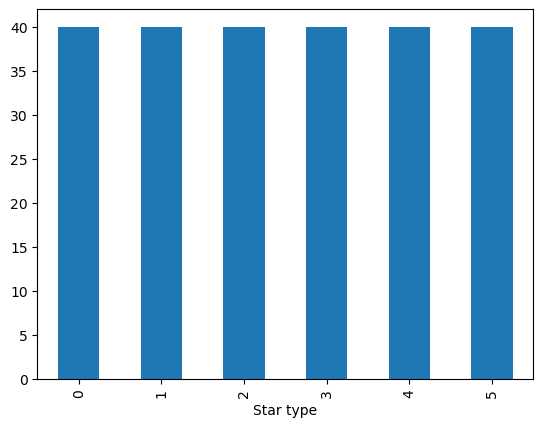

In [5]:
# Let see with a var chart the value counts of each star type
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

Let's improve the bar plots
* Adjust the size of the figure for convinience
* Add the value of counts on top of bars
* Set the background to dark
* Change the color of each %bookmark
* Add a title
* Add y label and change color of y ticks
* Replace x ticks from 0, 1, 2, 3, 4, 5 to respective name of star type
* Save the plot

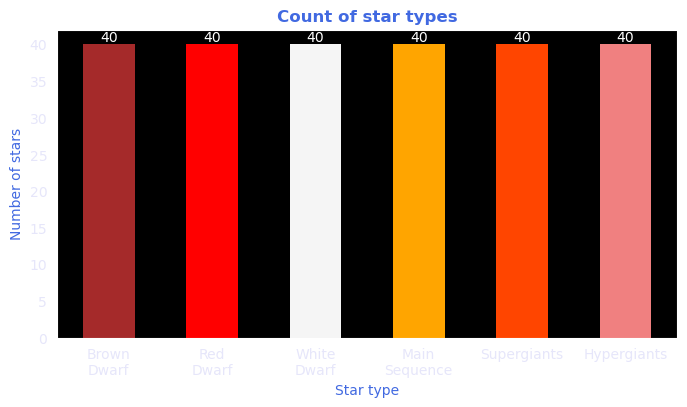

In [6]:
# Customized plot
plt.figure(figsize=(8, 4))
plt.style.use('dark_background')  # Check plt.style.available to see themes
ax = star_df['Star type'].value_counts().plot(kind='bar',
                                              color=['brown', 'red',
                                                     'whitesmoke',
                                                     'orange', 'orangered',
                                                     'lightcoral'])
# Print count for each bar
ax.bar_label(ax.containers[0], color='white')
# Aesthetic adjusments
plt.title('Count of star types', weight='bold', color='royalblue')
plt.yticks(color='lavender')
plt.ylabel('Number of stars', color='royalblue', fontsize=10)
plt.xticks([0, 1, 2, 3, 4, 5], 
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf',
                   'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=0, color='lavender')
plt.xlabel('Star type', color='royalblue')
plt.savefig('plots/star_count.png')

### Seaborn and Matplotlib

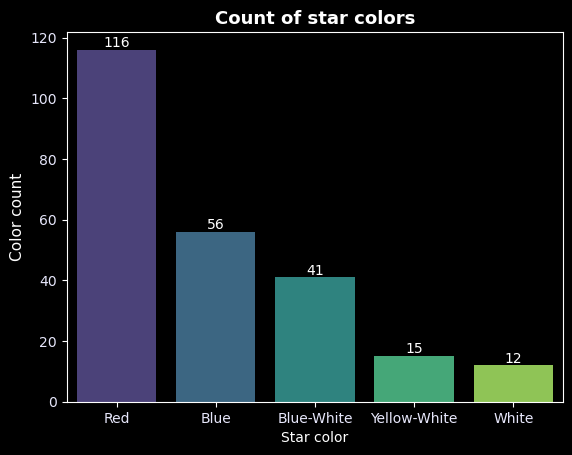

In [7]:
# Now, visualize the star color data 
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')
ax.bar_label(ax.containers[0])
plt.yticks(color='lavender')
plt.xticks(color='lavender')
plt.title('Count of star colors', weight='bold', fontsize=13)
plt.ylabel('Color count', color='white', fontsize=11)
plt.savefig('plots/color_count.png')

## Visualize outliers for numeric values
* Now we will create subplots for all numeric features
* When we create multiple plots inside a figure that is a subplot
* It needs to know how many rows and columns to use when creating the subplot
* `plt.subplot(rows, cols, position)` where position indicates out of all rows and columns, which position to plot in.

For example, `plt.subplot(2, 3, 2)` create a plot on the second position of 6 available positions. 

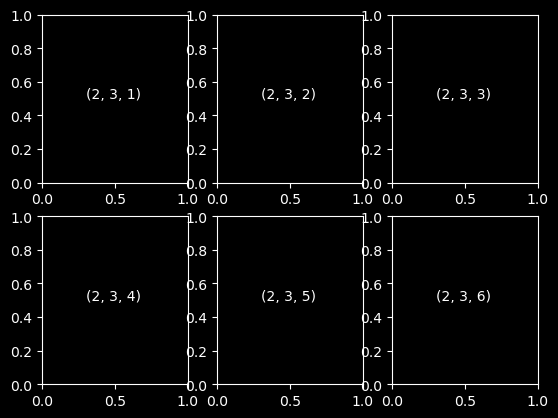

In [8]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.annotate(f'(2, 3, {i})', (0.3, 0.5))
plt.show()

In [9]:
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


* The numeric columns are the first 4 columns.
* We can see them in a subplot in a row

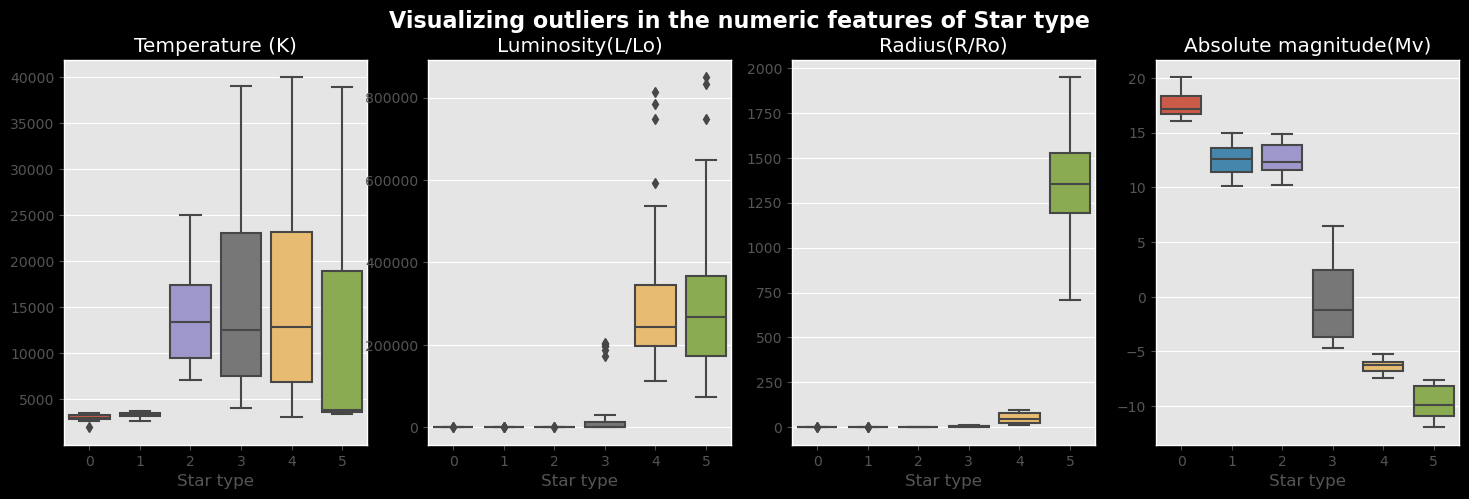

In [10]:
# Visualize outliers in data
## Create the subplots changing the index values
plt.figure(figsize=(18,5))
# Set style and figue title
plt.style.use('ggplot')
plt.suptitle('Visualizing outliers in the numeric features of Star type',
             weight='bold', fontsize=16)
# Make all the subplots
for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
    plt.title(star_df.columns[i])
    plt.ylabel('')

plt.savefig('plots/boxplot_star_type.png')

## Linear plots
* Show how values are distribuited for each numeric features

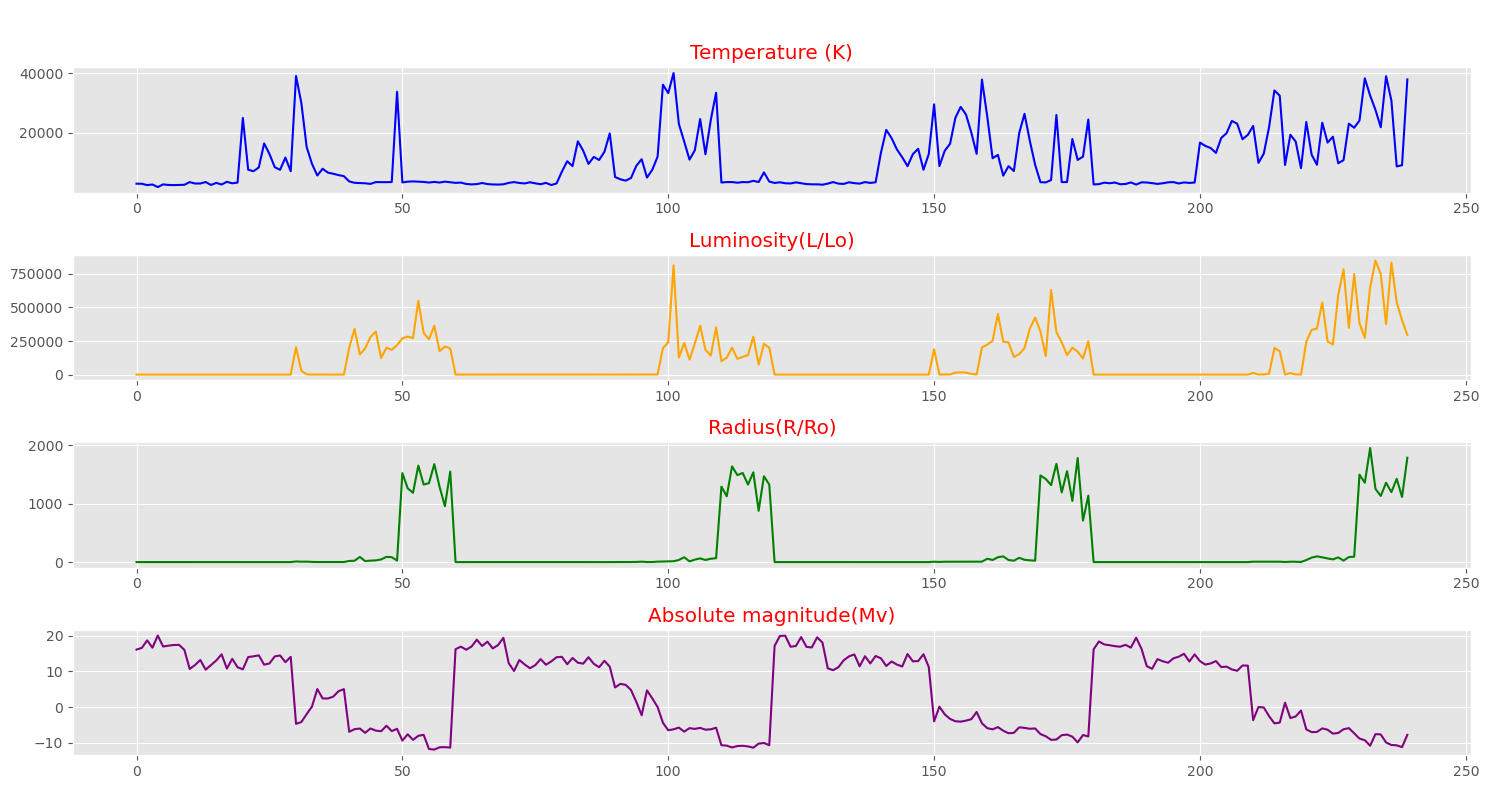

In [11]:
# Line plots
colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 8))
plt.suptitle('Visualizing the distribution of Numeric Features',
             weight='bold', fontsize=15)
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(star_df.iloc[:, i], color=colors[i])
    plt.title(star_df.columns[i], color='red')

# Adjust margins and padding for the plots
plt.tight_layout()
plt.show()

Also, we can change the process by a function

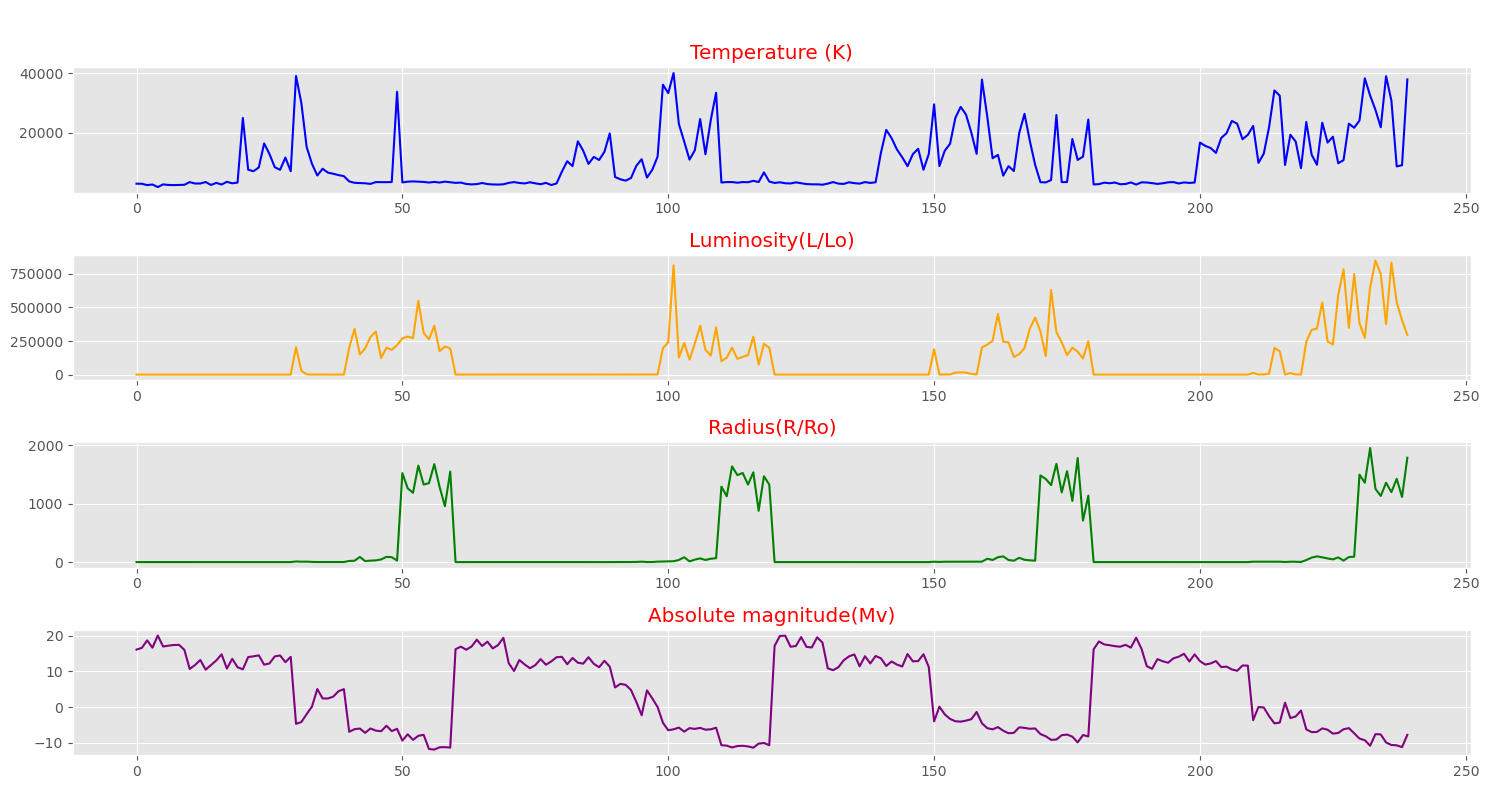

In [12]:
def line_subplot(star_df, colors, i):
    plt.subplot(4, 1, i+1)
    plt.plot(star_df.iloc[:, i], color=colors[i])
    plt.title(star_df.columns[i], color='red')


colors = ['blue', 'orange', 'green', 'purple']
plt.figure(figsize=(15, 8))
plt.suptitle('Visualizing the distribution of Numeric Features',
             weight='bold', fontsize=15)
for i in range(4):
    line_subplot(star_df, colors, i)

plt.tight_layout()
plt.show()

## Pair plot
- It will give you the scatter plot by default and you can change the kind of plot you want for of all variables with each other.
- It gives all the plots together without using subplot manually.
- That's the power of seaborn! But it has a disadvantage as well.
- If you have a lot more features in your dataset then it would be too time consuming to run this + it won't be properly visible.
- However, as we have less features let's obtain scatter pairplot with hue being set to Spectral Class.
- Hue will allow us to compare two different features with respect to the spectral class.

/home/roberth/micromamba/envs/DAV/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roberth/micromamba/envs/DAV/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roberth/micromamba/envs/DAV/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/roberth/micromamba/envs/DAV/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

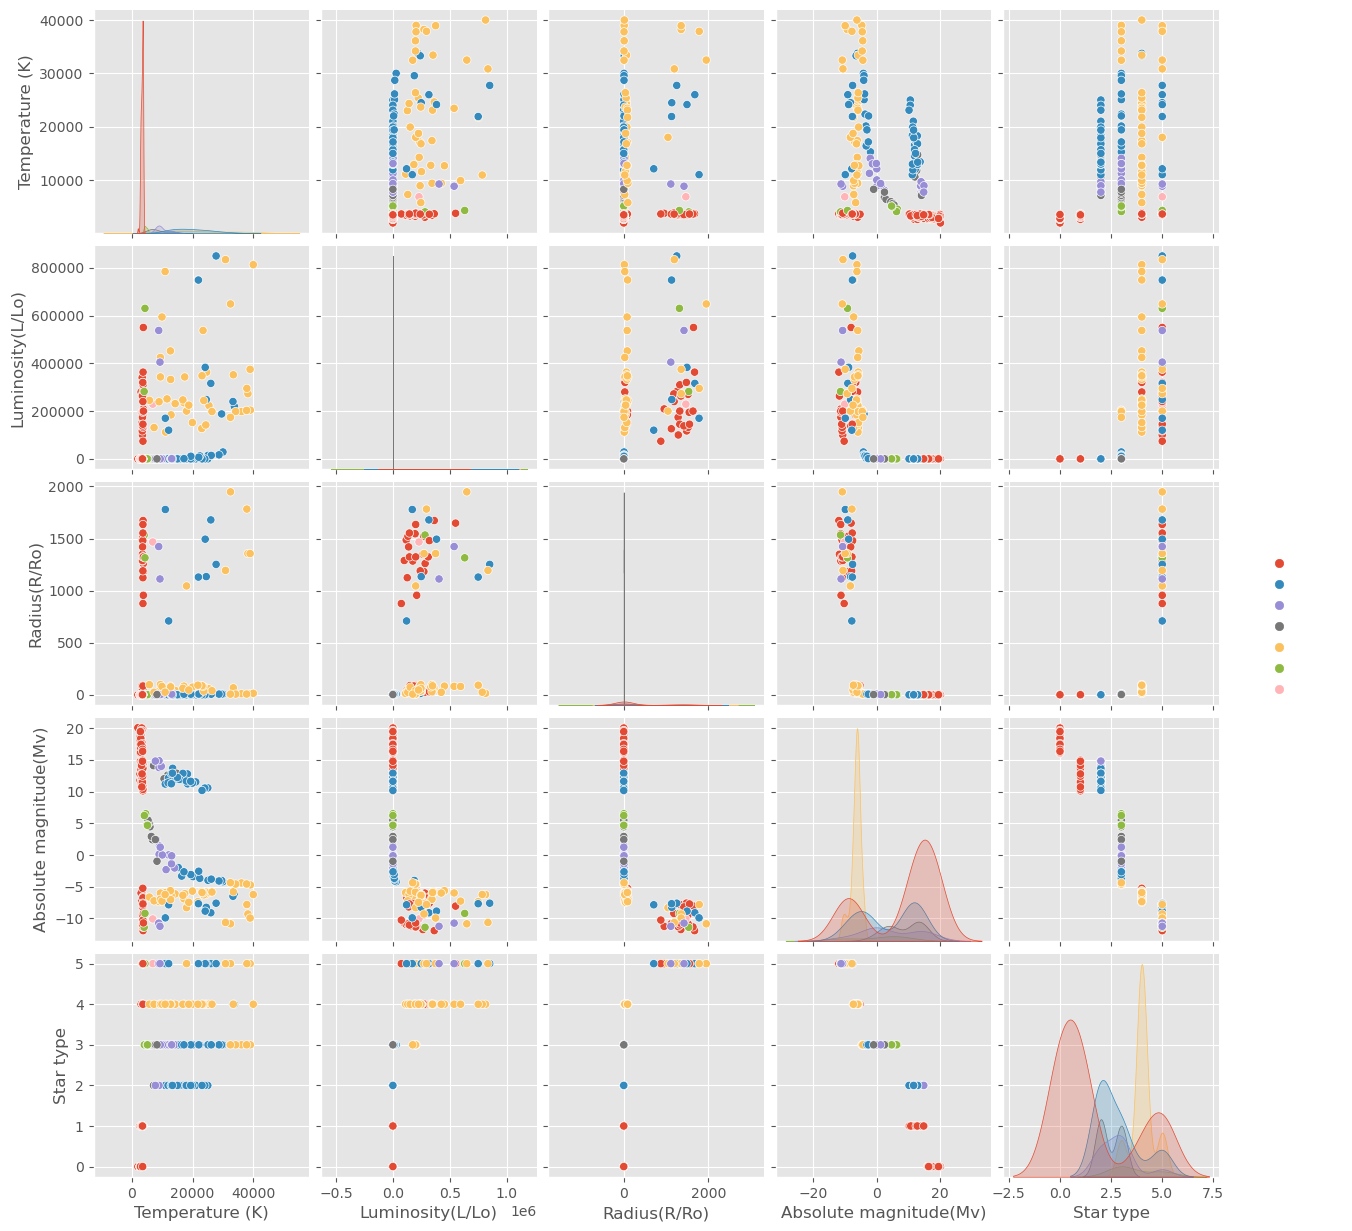

In [13]:
# Set a pair plot
sns.pairplot(star_df, hue='Spectral Class') # hue is a categorical variable
plt.savefig('plots/pairplots.png')

## Create a HR diagram 
- Using the information we have in our star_df let us try to create something like this:
<img src = 'https://www.space.fm/astronomy/images/diagrams/hr.jpg'>

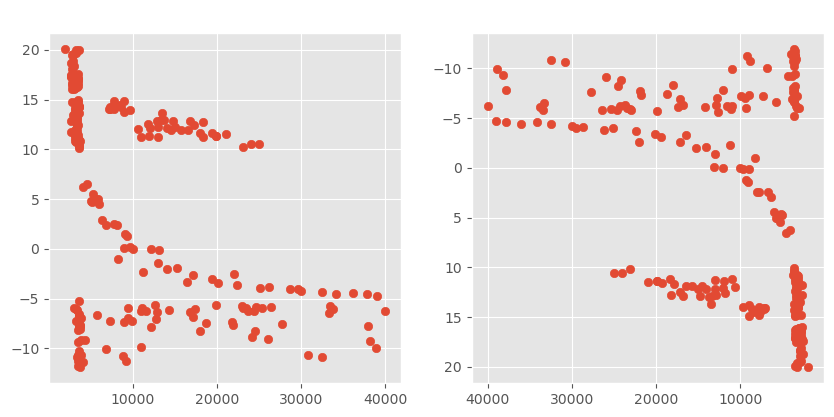

In [14]:
# Plotting the HR diagram
## First, let's plot Absolute magnitude vs Temperature
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

plt.figure(figsize=(10,10))

# Plot the scatter plot
plt.subplot(2, 2, 1)
plt.title('Step 1')
plt.scatter(temperature, abs_mag)
# Now, We have to change the axes
plt.subplot(2, 2, 2)
plt.title('Step 2')
plt.scatter(temperature, abs_mag)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Now, we create a dictionary with the properties for each star type

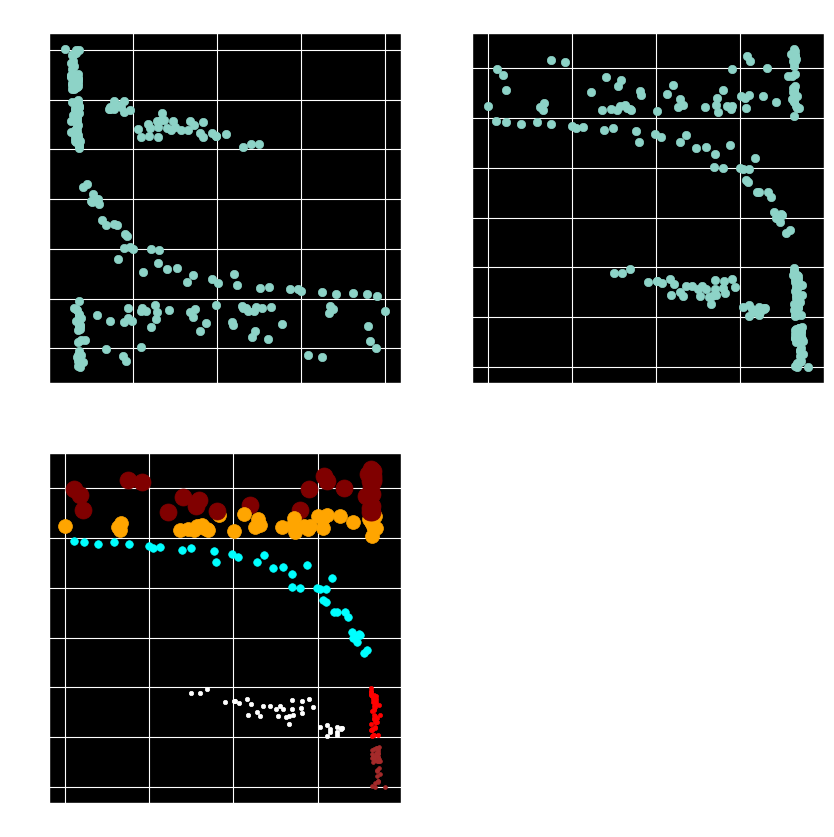

In [15]:
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

plt.figure(figsize=(10, 10))
plt.style.use('dark_background')
# Plot the scatter plot
plt.subplot(2, 2, 1)
plt.title('Step 1')
plt.scatter(temperature, abs_mag)
# Now, We have to change the axes
plt.subplot(2, 2, 2)
plt.title('Step 2')
plt.scatter(temperature, abs_mag)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
# With the new properties
plt.subplot(2, 2, 3)
plt.title('Step 3')
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    plt.scatter(temperature[i], abs_mag[i],
                c=properties['color'],
                s=properties['size'],
                marker=properties['marker'],
                label=properties['label']
                )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Create a legend to explain data points

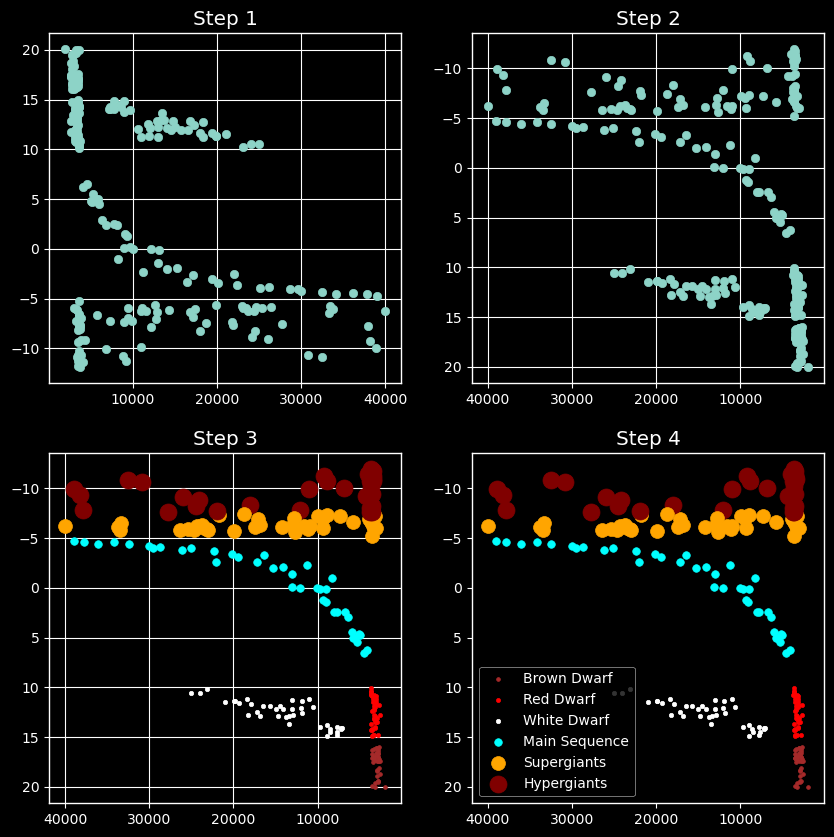

In [16]:
plt.figure(figsize=(10, 10))

# Plot the scatter plot
plt.subplot(2, 2, 1)
plt.title('Step 1')
plt.scatter(temperature, abs_mag)

# Now, We have to change the axes
plt.subplot(2, 2, 2)
plt.title('Step 2')
plt.scatter(temperature, abs_mag)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# With the new properties
plt.subplot(2, 2, 3)
plt.title('Step 3')
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    plt.scatter(temperature[i], abs_mag[i],
                c=properties['color'],
                s=properties['size'],
                marker=properties['marker'],
                label=properties['label']
                )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Prepare legend
axes = []
labels = set()
plt.subplot(2, 2, 4)
plt.title('Step 4')
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    if properties['label'] not in labels:
        ax = plt.scatter(temperature[i], abs_mag[i],
                         c=properties['color'],
                         s=properties['size'],
                         marker=properties['marker'],
                         label=properties['label']
                         )
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temperature[i], abs_mag[i],
                    c=properties['color'],
                    s=properties['size'],
                    marker=properties['marker'],
                    label=properties['label']
                    )

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid(False)
plt.legend(handles=axes)
plt.show()

Final result

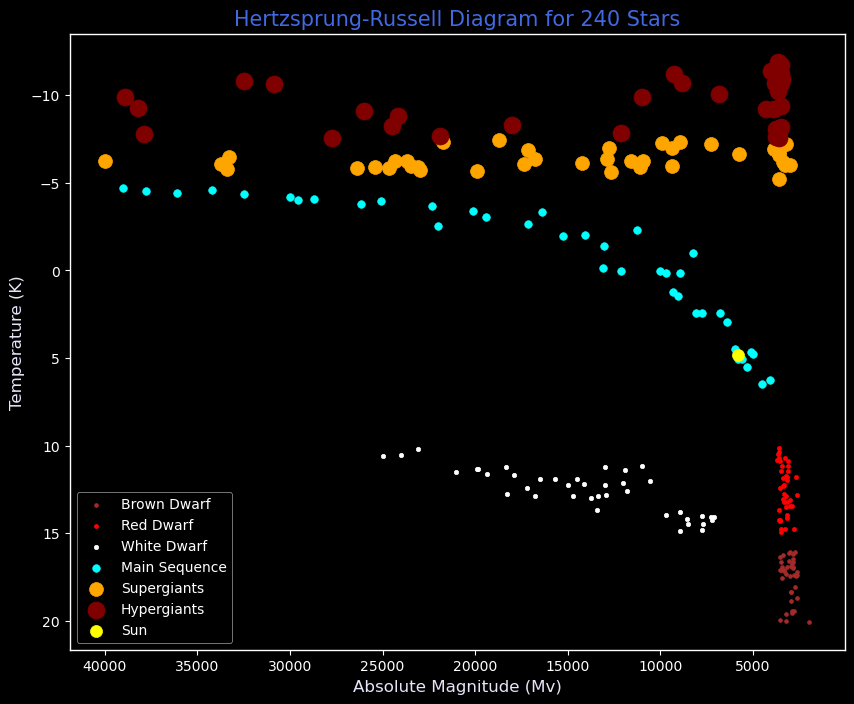

In [17]:
# Prepare data
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

# Empty arrays for the labels
axes = []
labels = set()

# Set the plot
plt.figure(figsize=(10, 8))
plt.title(f'Hertzsprung-Russell Diagram for {len(star_type)} Stars',
          fontsize=15, color='royalblue')
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    if properties['label'] not in labels:
        ax = plt.scatter(temperature[i], abs_mag[i],
                         c=properties['color'],
                         s=properties['size'],
                         marker=properties['marker'],
                         label=properties['label']
                         )
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temperature[i], abs_mag[i],
                    c=properties['color'],
                    s=properties['size'],
                    marker=properties['marker'],
                    label=properties['label']
                    )

# Add data from the sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker='o', label='Sun')
axes.append(ax_sun)
labels.add('Sun')

plt.xlabel('Absolute Magnitude (Mv)', fontsize=12, color='lavender')
plt.ylabel('Temperature (K)', fontsize=12, color='lavender')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid(False)
plt.legend(handles=axes)
plt.savefig('plots/HR_diagram.png')

## Machine Learning Model
The best way to study the machine learning models is with the implementation of two datasets, the training and test. We can get them using `scikit-learn`

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, jaccard_score, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [67]:
X = star_df.drop('Star type', axis=1)
Y = star_df['Star type']

In [68]:
X = X[['Temperature (K)', 'Absolute magnitude(Mv)']]

In [69]:
# First, we prepare the data
scaler = StandardScaler()
#X.iloc[:, :4] = scaler.fit_transform(X.iloc[:, :4])
X = scaler.fit_transform(X)
onc = OrdinalEncoder()
#X[['Star color', 'Spectral Class']] = onc.fit_transform(X[['Star color', 'Spectral Class']])
# And split in training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [70]:
# Now we create all the models
clf = SGDClassifier()
clf.fit(X_train, Y_train)
svc = SVC()
svc.fit(X_train, Y_train)
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)
rdc = RandomForestClassifier()
rdc.fit(X_train, Y_train)

RandomForestClassifier()

## Comparing models

In [96]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(["brown", "red", "white", 'cyan', 'orange', 'orange', 'maroon'])

In [72]:
# Prepare data
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

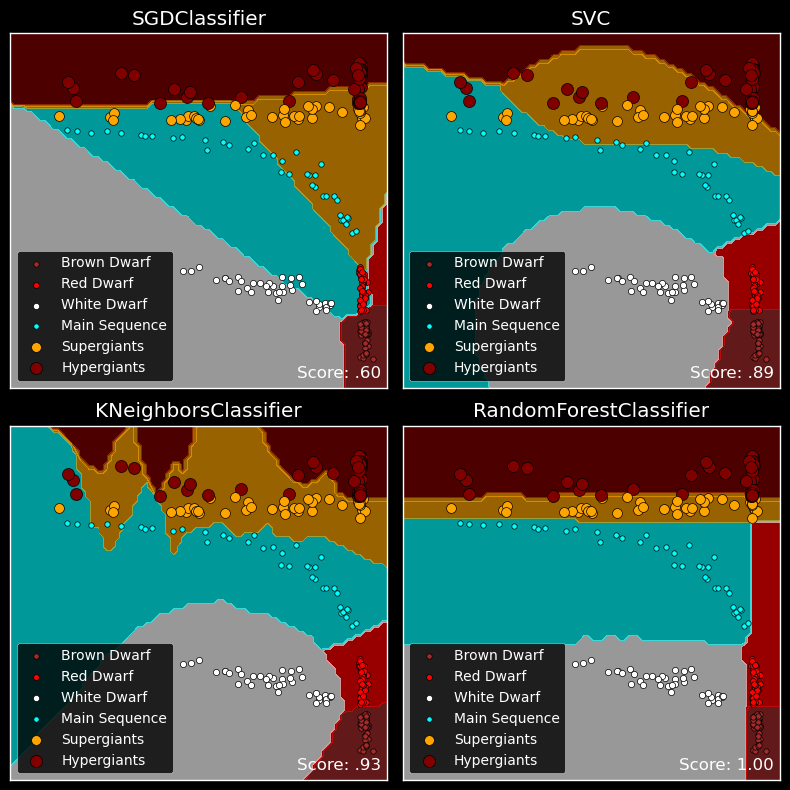

In [155]:
# Classifiers
classifiers = [clf, svc, knc, rdc]

# Set the plot
plt.figure(figsize=(8, 8))
i = 1
for model in classifiers:
    axes = []
    labels = set()
    ax = plt.subplot(2, 2, i)
    DecisionBoundaryDisplay.from_estimator(model, X, eps=0.8, cmap=cmap, alpha=0.6, ax=ax)
    for j in range(len(X)):
        if star_types[Y[j]]['label'] not in labels:
            axe = ax.scatter(X[j, 0], X[j, 1], c=star_types[Y[j]]['color'],
                       s=star_types[Y[j]]['size']*2,
                       marker='.',
                       label=star_types[Y[j]]['label'],
                       edgecolors='k')
            axes.append(axe)
            labels.add(star_types[Y[j]]['label'])
        else:
            ax.scatter(X[j, 0], X[j, 1], c=star_types[Y[j]]['color'],
                       s=star_types[Y[j]]['size']*2,
                       marker='.',
                       label=star_types[Y[j]]['label'],
                       edgecolors='k')
    ax.set_xlim(X[:, 0].min()*1.2, X[:, 0].max()*1.2)
    ax.set_ylim(X[:, 1].min()*1.2, X[:, 1].max()*1.2)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.grid(False)
    ax.set_title(str(model)[:-2])
    ax.legend(handles=axes)
    ax.text(
            X[:, 0].min() - 0.1,
            X[:, 1].max() + 0.2,
            "Score: " + ("%.2f" % model.score(X, Y)).lstrip("0"),
            size=12,
            horizontalalignment="right",
            color='white'
        )
    i += 1
#plt.xlabel('Absolute Magnitude (Mv)', fontsize=12, color='lavender')
#plt.ylabel('Temperature (K)', fontsize=12, color='lavender')
#plt
plt.tight_layout()
plt.savefig('test.png')